# Test echelle on RGB star

In [1]:
import lightkurve as lk
import warnings
warnings.filterwarnings('ignore')

In [8]:
datalist = lk.search_lightcurvefile('16CygA',cadence='short')
data = datalist[3:4].download_all()
lc = data[0].PDCSAP_FLUX.normalize().flatten()
for nlc in data:
    lc = lc.append(nlc.PDCSAP_FLUX.normalize().flatten())
lc = lc.remove_nans()
pg = lc.to_periodogram(normalization='psd')
snr = pg.flatten()

Our value for numax is: 2190.08 uHz
Our value for dnu is: 103.41 uHz


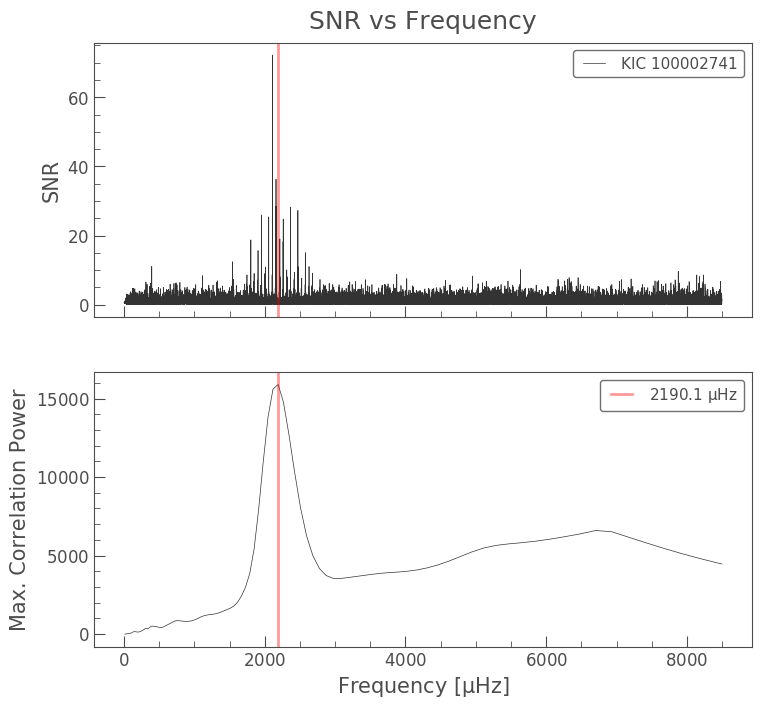

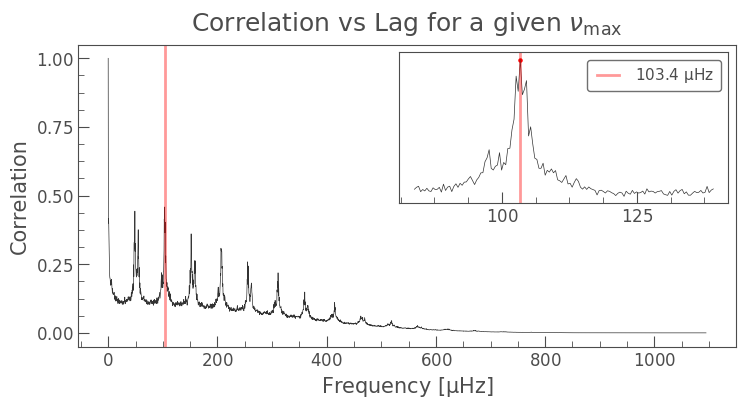

In [9]:
numax, ax = snr.estimate_numax(show_plots=True)
print('Our value for numax is: {:.2f}'.format(numax))
dnu, ax = snr.estimate_dnu(show_plots=True)
print('Our value for dnu is: {:.2f}'.format(dnu))

In [18]:
import numpy as np
import pylab as plt

In [40]:
f = snr.frequency.value
p = snr.power.value
d = dnu.value
nmx = numax.value
fwhm = 0.25*numax.value
fs = np.median(np.diff(f))

In [41]:
fmin = nmx - fwhm
fmax = nmx + fwhm


samplinginterval = np.median(np.diff(f))

xp = np.arange(fmin,fmax+d,samplinginterval)
yp = np.interp(xp, f, p) #This shouldn't be interpolation, this should be a slice...

n_stack = int((fmax-fmin)/d)
n_element = int(d/samplinginterval)


In [42]:
morerow = 2
arr = np.arange(1,n_stack) * d #This accounts for the rounding error I think?
arr2 = np.array([arr,arr])
yn = np.reshape(arr2,len(arr)*2,order="F")
yn = np.insert(yn,0,0.0)  #Add on a zero
yn = np.append(yn,n_stack*d) + fmin #Add on the top?

In [43]:
xn = np.linspace(1, n_element, n_element) * d
z = np.zeros([n_stack*morerow,n_element])

In [44]:
#This stacks the power values
for i in range(n_stack):
    for j in range(i*morerow,(i+1)*morerow):
        z[j,:] = yp[n_element*(i):n_element*(i+1)]

In [46]:
xn

array([  103.41152538,   206.82305076,   310.23457614,   413.64610152,
         517.0576269 ,   620.46915228,   723.88067766,   827.29220304,
         930.70372842,  1034.1152538 ,  1137.52677918,  1240.93830456,
        1344.34982993,  1447.76135531,  1551.17288069,  1654.58440607,
        1757.99593145,  1861.40745683,  1964.81898221,  2068.23050759,
        2171.64203297,  2275.05355835,  2378.46508373,  2481.87660911,
        2585.28813449,  2688.69965987,  2792.11118525,  2895.52271063,
        2998.93423601,  3102.34576139,  3205.75728677,  3309.16881215,
        3412.58033753,  3515.99186291,  3619.40338829,  3722.81491367,
        3826.22643905,  3929.63796442,  4033.0494898 ,  4136.46101518,
        4239.87254056,  4343.28406594,  4446.69559132,  4550.1071167 ,
        4653.51864208,  4756.93016746,  4860.34169284,  4963.75321822,
        5067.1647436 ,  5170.57626898,  5273.98779436,  5377.39931974,
        5480.81084512,  5584.2223705 ,  5687.63389588,  5791.04542126,
      

Text(0, 0.5, 'Frequency')

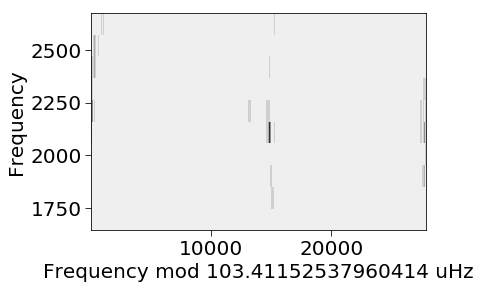

In [45]:
fig, ax = plt.subplots()
# nlevels=32
# levels = np.linspace(np.min(z),np.max(xn),nlevels)
# Using levels is very slow for some reason.. 

ax.contourf(xn,yn,z,cmap='gray_r')
# ax.axis([np.min(xn),np.max(xn),np.min(yn),np.max(yn)])

ax.set_xlabel(r'Frequency' +' mod ' + str(dnu))
ax.set_ylabel(r'Frequency')

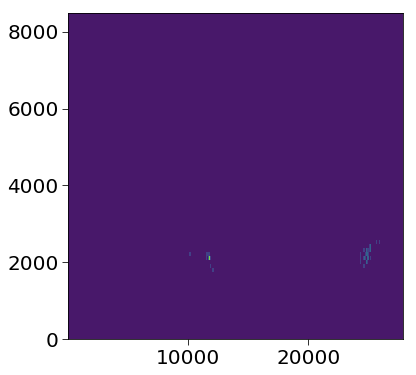

In [31]:
fig = plt.figure(figsize=(6,6))
plt.contourf(xn, yn, z)